Data from https://www.kaggle.com/c/bioresponse

In [1]:
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
df = pd.DataFrame.from_csv('trainbio.csv', index_col=None)

In [3]:
dfc=df.corr()

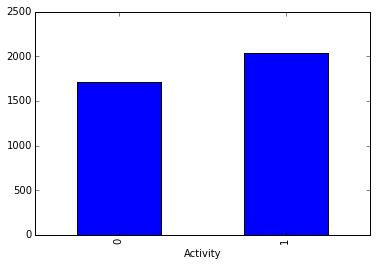

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
df.groupby(df.Activity).size().plot(kind='bar')

In [5]:
dfc1=dfc[abs(dfc.Activity)>=0.05]
dfc1=pd.DataFrame(dfc1.Activity)
dfc1['corr']=dfc1['Activity']
dfc1=dfc1.drop('Activity',1)
chkcorr=dfc1.sort('corr')
print 'highest correlation'
chkcorr.head(10)

highest correlation


,corr
D217,-0.233387
D87,-0.223081
D187,-0.198590
D158,-0.197721
D60,-0.180185
D61,-0.174588
D173,-0.169300
D175,-0.162607
D129,-0.153477
D103,-0.151922


In [6]:
dft=pd.DataFrame(df.T)
dfm=pd.merge(dfc1,dft,left_index='True',right_index='True')
dfm=dfm.drop('corr',1)
dfm=pd.DataFrame(dfm.T)


In [7]:
dfm.shape

(3751, 519)

In [8]:
list(dfm)

['Activity',
 'D1',
 'D2',
 'D3',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D13',
 'D14',
 'D15',
 'D16',
 'D17',
 'D18',
 'D19',
 'D20',
 'D21',
 'D23',
 'D26',
 'D27',
 'D30',
 'D31',
 'D32',
 'D35',
 'D36',
 'D41',
 'D43',
 'D48',
 'D49',
 'D50',
 'D51',
 'D52',
 'D55',
 'D56',
 'D59',
 'D60',
 'D61',
 'D62',
 'D63',
 'D64',
 'D66',
 'D67',
 'D68',
 'D69',
 'D70',
 'D73',
 'D74',
 'D75',
 'D76',
 'D77',
 'D78',
 'D79',
 'D81',
 'D83',
 'D84',
 'D85',
 'D87',
 'D88',
 'D89',
 'D96',
 'D97',
 'D98',
 'D100',
 'D101',
 'D103',
 'D106',
 'D108',
 'D116',
 'D117',
 'D119',
 'D124',
 'D125',
 'D129',
 'D131',
 'D132',
 'D133',
 'D134',
 'D135',
 'D136',
 'D138',
 'D140',
 'D141',
 'D144',
 'D146',
 'D147',
 'D149',
 'D152',
 'D153',
 'D154',
 'D155',
 'D156',
 'D158',
 'D159',
 'D160',
 'D161',
 'D162',
 'D163',
 'D164',
 'D173',
 'D174',
 'D175',
 'D177',
 'D181',
 'D182',
 'D183',
 'D186',
 'D187',
 'D194',
 'D196',
 'D197',
 'D198',
 'D200',
 'D201',
 'D202',
 'D204',
 'D207

In [9]:
from sklearn.ensemble import RandomForestClassifier
dfm=np.array(dfm)
cfr = RandomForestClassifier(n_estimators=100, random_state=40)
target = np.array([x[0] for x in dfm])
features = np.array([x[1:] for x in dfm])
cfr.fit(features, target)
importances = cfr.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature no.{} ({})".format(i+1,indices[i],importances[indices[i]])

Feature Ranking: 
1 feature no.21 (0.0412771059582)
2 feature no.42 (0.0149759011794)
3 feature no.11 (0.0148549219389)
4 feature no.8 (0.0131522148441)
5 feature no.67 (0.0126827814426)
6 feature no.3 (0.0111456384808)
7 feature no.12 (0.0108078287768)
8 feature no.4 (0.0104894485651)
9 feature no.5 (0.0100650837832)
10 feature no.13 (0.0100116553434)


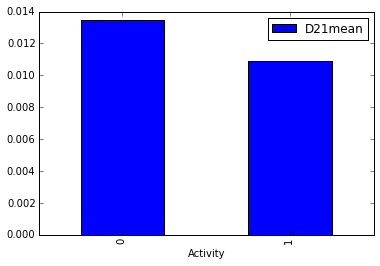

In [10]:
grp=pd.DataFrame({'D21mean': df.groupby(by=['Activity'])['D21'].mean()}).reset_index()
grp.plot(x='Activity',y='D21mean',kind='bar')

In [11]:
df[['Activity','D21']].corr()

,Activity,D21
Activity,1.000000,-0.081993
D21,-0.081993,1.000000


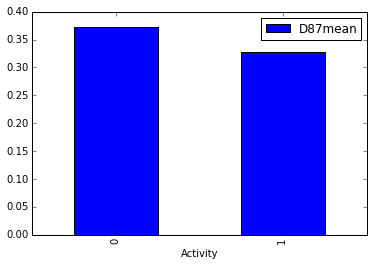

In [12]:
grp=pd.DataFrame({'D87mean': df.groupby(by=['Activity'])['D87'].mean()}).reset_index()
grp.plot(x='Activity',y='D87mean',kind='bar')

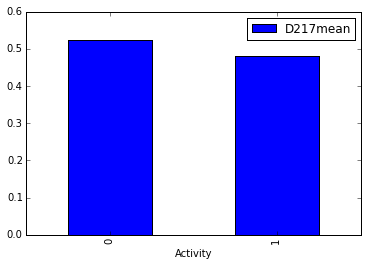

In [13]:
grp=pd.DataFrame({'D217mean': df.groupby(by=['Activity'])['D217'].mean()}).reset_index()
grp.plot(x='Activity',y='D217mean',kind='bar')


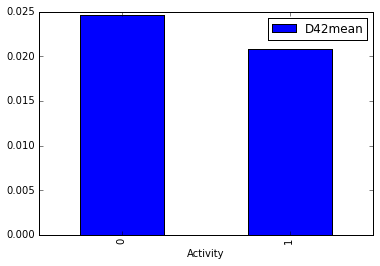

In [14]:
grp=pd.DataFrame({'D42mean': df.groupby(by=['Activity'])['D42'].mean()}).reset_index()
grp.plot(x='Activity',y='D42mean',kind='bar')

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,f1_score
from scipy import interp

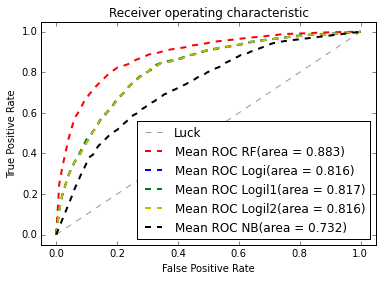

In [62]:
    target = np.array([x[0] for x in dfm])
    features = np.array([x[1:] for x in dfm])
    
    X1 = SelectKBest(chi2,k=450).fit_transform(features,target)
    X2 = SelectKBest(chi2,k=100).fit_transform(features,target)
    X3 = SelectKBest(chi2,k=100).fit_transform(features,target)
    X4 = SelectKBest(chi2,k=100).fit_transform(features,target)
    X5 = SelectKBest(chi2,k=60).fit_transform(features,target)
    
    clf1 = RandomForestClassifier(n_estimators=100, random_state=40,min_samples_split=2)
    clf2=LogisticRegression(random_state=40)
    clf3=LogisticRegression(penalty='l1',random_state=40)
    clf4=LogisticRegression(penalty='l2',random_state=40)
    clf5=GaussianNB()
    cv = cross_validation.KFold(len(features), n_folds=10,shuffle=True, random_state=40)
    mean_tpr1 = 0.0
    mean_fpr1 = np.linspace(0, 1, 100)
    mean_tpr2 = 0.0
    mean_fpr2 = np.linspace(0, 1, 100)
    mean_tpr3 = 0.0
    mean_fpr3 = np.linspace(0, 1, 100)
    mean_tpr4 = 0.0
    mean_fpr4 = np.linspace(0, 1, 100)
    mean_tpr5 = 0.0
    mean_fpr5 = np.linspace(0, 1, 100)
    all_tpr=[]
    for i,(train, test) in enumerate(cv):
                
                probas1 = clf1.fit(X1[train], target[train]).predict_proba(X1[test])
                # Compute ROC curve and area the curve
                fpr1, tpr1, thresholds1 = roc_curve(target[test], probas1[:, 1])
                
                mean_tpr1 += interp(mean_fpr1, fpr1, tpr1)
                mean_tpr1[0] = 0.0
                roc_auc1 = auc(fpr1, tpr1)
                probas2 = clf2.fit(X2[train], target[train]).predict_proba(X2[test])
                # Compute ROC curve and area the curve
                fpr2, tpr2, thresholds2 = roc_curve(target[test], probas2[:, 1])
                
                mean_tpr2 += interp(mean_fpr2, fpr2, tpr2)
                mean_tpr2[0] = 0.0
                roc_auc2 = auc(fpr2, tpr2)
                probas3 = clf3.fit(X3[train], target[train]).predict_proba(X3[test])
                # Compute ROC curve and area the curve
                fpr3, tpr3, thresholds3 = roc_curve(target[test], probas3[:, 1])
                
                mean_tpr3 += interp(mean_fpr3, fpr3, tpr3)
                mean_tpr3[0] = 0.0
                roc_auc3 = auc(fpr3, tpr3)
                probas4 = clf4.fit(X4[train], target[train]).predict_proba(X4[test])
                # Compute ROC curve and area the curve
                fpr4, tpr4, thresholds4 = roc_curve(target[test], probas4[:, 1])
                
                mean_tpr4 += interp(mean_fpr4, fpr4, tpr4)
                mean_tpr4[0] = 0.0
                roc_auc4 = auc(fpr4, tpr4)
                probas5 = clf5.fit(X5[train], target[train]).predict_proba(X5[test])
                # Compute ROC curve and area the curve
                fpr5, tpr5, thresholds5 = roc_curve(target[test], probas5[:, 1])
                
                mean_tpr5 += interp(mean_fpr5, fpr5, tpr5)
                mean_tpr5[0] = 0.0
                roc_auc5 = auc(fpr5, tpr5)
    
    mean_tpr1 /= len(cv)
    mean_tpr1[-1] = 1.0
    mean_auc1 = auc(mean_fpr1, mean_tpr1)
                
    
    mean_tpr2 /= len(cv)
    mean_tpr2[-1] = 1.0
    mean_auc2 = auc(mean_fpr2, mean_tpr2)
                
    
    mean_tpr3 /= len(cv)
    mean_tpr3[-1] = 1.0
    mean_auc3 = auc(mean_fpr3, mean_tpr3)
                
    
    mean_tpr4 /= len(cv)
    mean_tpr4[-1] = 1.0
    mean_auc4 = auc(mean_fpr4, mean_tpr4)
                
    
    mean_tpr5 /= len(cv)
    mean_tpr5[-1] = 1.0
    mean_auc5 = auc(mean_fpr5, mean_tpr5)
    
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.plot(mean_fpr1, mean_tpr1, 'k--',
             label='Mean ROC RF(area = %0.3f)' % mean_auc1, lw=2,color='r')
    plt.plot(mean_fpr2, mean_tpr2, 'k--',
             label='Mean ROC Logi(area = %0.3f)' % mean_auc2, lw=2,color='b')
    plt.plot(mean_fpr3, mean_tpr3, 'k--',
             label='Mean ROC Logil1(area = %0.3f)' % mean_auc3, lw=2,color='g')
    plt.plot(mean_fpr4, mean_tpr4, 'k--',
             label='Mean ROC Logil2(area = %0.3f)' % mean_auc4, lw=2,color='y')
    plt.plot(mean_fpr5, mean_tpr5, 'k--',
             label='Mean ROC NB(area = %0.3f)' % mean_auc5, lw=2)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ')
    plt.legend(loc="lower right")
    plt.show()
    
            

In [ ]:
from sklearn.grid_search import GridSearchCV
from operator import itemgetter
from scipy.stats import randint as sp_randint

cfr = RandomForestClassifier(n_estimators=100, random_state=40)
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters and distributions to sample from
#param_grid = {"max_depth": [3, None],
              "max_features": [200, 300, 400],
              "min_samples_split": [2, 20, 50],
              "min_samples_leaf": [2, 20, 50],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(cfr, param_grid=param_grid)
grid_search.fit(features, target)


report(grid_search.grid_scores_)

In [27]:

def cutoff_predict(clf,X1,cutoff):
    return (clf.predict_proba(X1)[:,1]>cutoff).astype(int)
scores=[]

def custom_f1(cutoff):
    def f1_cutoff(clf,X1,target):
        ypred=cutoff_predict(clf,X1,cutoff)
        return f1_score(target,ypred)
    return f1_cutoff
for cutoff in np.arange(0.1,0.9,0.1):
    clf=RandomForestClassifier(n_estimators=100)
    validated=cross_val_score(clf,X1,target,cv=10,scoring=custom_f1(cutoff))
    scores.append(validated)

<function matplotlib.pyplot.show>

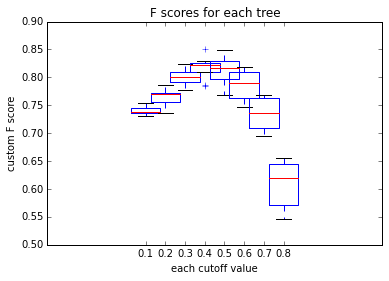

In [42]:

plt.boxplot(scores,positions=np.arange(0.1,0.9,0.1))
plt.title('F scores for each tree')
plt.xlabel('each cutoff value')
plt.ylabel('custom F score')

plt.show

0.4 seems to be the optimal threshold

Predicting with Randomforest

In [63]:
target = np.array([x[0] for x in dfm])
features = np.array([x[1:] for x in dfm])
c=SelectKBest(chi2,k=450)
c.fit_transform(features,target)
t=c.get_support()
t=pd.DataFrame(t)
t['keep']=t[0]
len(t[t.keep==True])

450

In [64]:
test = pd.DataFrame.from_csv('testbio.csv', index_col=None)
testt=pd.DataFrame(test.T)
testm=pd.merge(dfc1,testt,left_index='True',right_index='True')
testm=testm.drop('corr',1)
t1 = t.set_index(testm.index)
testm['keep']=t1['keep']
testm=testm[testm.keep==True]
testm=testm.drop('keep',1)
testm=testm.T


In [65]:
testa=np.array(testm)
test = np.array([x[0:] for x in testa])
target = np.array([x[0] for x in dfm])
features = np.array([x[1:] for x in dfm])
X_new = SelectKBest(k=450).fit_transform(features,target)
#cfr = RandomForestClassifier(n_estimators=100, random_state=40,min_samples_split=10)
cfr = RandomForestClassifier(n_estimators=100, random_state=40)
cfr.fit(X_new, target)
#cfr.fit(features, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [66]:

predicted_probs = [[index + 1, x[1]] for index, x in enumerate(cfr.predict_proba(test))]
from numpy import genfromtxt, savetxt
savetxt('submission.csv', predicted_probs, delimiter=',', fmt='%d,%f',header='MoleculeId,PredictedProbability', comments = '')

                            